# 假设检验

## 区域检验
89年新生儿体重，均值3190， 方差80 ，样本量100，置信水平95%

In [3]:
mu = 3190
r = 1.96* 80/100**.5
r

15.680000000000001

In [4]:
print("置信区间：["+str(mu-r)+","+str(mu+r)+"]")

置信区间：[3174.32,3205.68]


即95%的样本均值落在改区间

 90年，均值3210， 方差80 ，样本量100

In [5]:
#z分布为
mu1 = 3210
z= (mu1-mu)/(80/100**.5)
z

2.5

![8-3](./img/8-3.jpg)
2.5>1.96 则根据小概率原理（发生概率很小的随机事件在一次实验中几乎不可能发生），认为总体的真值不是3190克

## 单侧检验

某批发商欲从厂家购进一批灯泡, 定灯泡的使用寿命平均不能低于1000小时，已知灯泡使用寿命服从正态分布，标准差为200小时。在总体中随机抽取100只灯泡，测得样本均值为960小时。批发商是否应该购买这批灯泡

In [6]:
z1 = (-40)/(200/100**.5)
print(z1)
print( "不该购买" if z1<1.96 else "可以购买")

-2.0
不该购买


In [7]:
from scipy.stats import norm
x=norm.cdf(abs(z1))
#单侧检验
p = (1-x)
print(p)
print(p<0.05)

0.02275013194817921
True


## 单参数的检验
### 均值
####  样本量大
某机床厂加工一种零件。根据经验知道,该厂加工零件的椭圆度近似服从正态分布,其总体均值为0.081mm,总体标准差为0.025。今另换一种新机床进行加工，取200个零件进行检验，得到椭圆度均值为0．072mm。试问新机床加工零件的椭圆度总体均值与以前有无显著差别？  
假设  
H0:mu = 0.081mm 无显著差别  
H1:mu !=0.081mm 有显著差别  

In [8]:
z = (0.076-0.081)/(0.025/200**.5)
z

-2.8284271247461925

z<-1.96 有显著差别

In [9]:
from scipy.stats import norm
x=norm.cdf(abs(z))
p=(1-x)*2
p

0.004677734981047177

##### 样本量小signma已知正态总体

某电子产品批量生产的质量标准为平均试用寿命1200小时，标准差为150小时，某厂宣称他们采用一种新工艺生产的元件质量大大超过规定标准。
为了进行验证，随机抽取了20件作为样本，测得平均使用寿命1245小时。能否说该厂生产的电子元件质量显著地高于规定标准

In [10]:
#大大超过标准 99% 单侧检验
z = (1245-1200)/(150/20**.5)
print(str(z)+"<Za（1.65）")
print("拒绝域在右侧，不能超过平均水平")

1.3416407864998738<Za（1.65）
拒绝域在右侧，不能超过平均水平


In [11]:
p =1 - norm.cdf(abs(z))
p
#p>a = 0.01 所以符合正常水平，未表现出显著差别

0.08985624743949994

##### 样本量小signma未知正态总体
某机器制造书的肥皂厚度为5cm，今欲了解机器性能是否良好，随机抽取10块肥皂作为样本，测得平均厚度为5.3标准差为0.3cm，试以0.05的显著水平检验机器的性能良好的假设。

In [12]:
from scipy import stats
#由于小样本
t = (5.3 - 5)/(0.3/10**.5)
t

3.1622776601683777

In [13]:
tn=stats.t.isf((0.05)/2,9)
#tn>t 在拒绝域 所以性能不好
tn

2.262157162740992

In [14]:
p = (1-stats.t.cdf(abs(t),df=9))*2
#p<0.05  所以性能不好
p

0.011507985165943646

##### 总体比例的检验

一项统计结果声称,某市老年人口(年龄在 65 岁以上)的比重为 14.7%,该市老年人口研究会为了检验该项统计 是否可靠,随机抽选了 400 名居民,发现其中有57人年龄在65岁以上。调查结果是否支持该市老年人口比重为14.7%的看法？(α= 0.05)

In [15]:
z = (57/400-.147)/(.147*(1-.147)/400)**.5
z

-0.25416124340864343

In [16]:
za2 = norm.isf(0.05/2)
za2

1.9599639845400545

In [17]:
print(z<-za2)
print("支持")

False
支持


##### 总体方差的检验

某厂商生产出一种新型的饮料装瓶机器,按设计要求,该机器装一瓶1000ml的饮料误差上下不超过1ml.如果达到设计要求,表明机器的稳定性非常好.现从该机器装完的产品中随机抽取25瓶,分别进行测定（用样本观测值分别减1000ml）,得到以下数据：0.3 -0.4 -0.7 1.4 -1.5 -1.3 .1.1等25个数值.试以0.05的显著性水平检验该机器的性能是否达到设计要求.

In [18]:
import pandas as pd
data = pd.read_excel("./data/例8.9.xlsx",head=1)
data.head()

,测试结果
0,0.3
1,-0.3
2,-1.3
3,-0.6
4,-0.5


In [19]:
#假设方差<=1 
# H1 方差>1
d = data.iloc[:,0].var()
chi2 = d*(len(data)-1)/1
chi2

20.781599999999997

In [20]:
chi2_ = stats.chi2.isf(0.05,len(data)-1)

In [21]:
print(chi2_>chi2)
# 在拒接域外，达到要求

True


## 两个参数的检验
### 均值差
#### σ1^2 σ2^2 已知 样本量大

有两种方法可用于制造某种以抗拉强度为重要特征的产品。根据以往的 资料得知,第一种方法生产出的产品其抗拉强度的标准差为8公斤, 第二种方法的标准差为 10公斤。从两 种方法生产的产品中各抽取一个随机样本。样本量分别为n1=32,n2=40,测得x1= 50公斤,?x2= 44公斤。问这 两种方法生产的产品平均抗拉强度是否有显著区别（a= 0.05）
假设  
H0 = mu1 - mu2 = 0  
H2 = mu1 - mu2 != 0

In [22]:
z = ((50 -  44)-(0))/(8**2/32 + 10**2/40)**.5
z

2.8284271247461903

In [23]:
za = stats.norm.isf(0.05/2)
za

1.9599639845400545

In [24]:
z>za
#拒接域 有显著区别

True

#### σ1^2 σ2^2 未知 样本量小
尽管存在争议，但大多数科学家任务，使用含有高纤维的谷物有助于降低癌症发生的可能性。 然而一个科学家提出，如果人们在早餐中食用高纤维的谷类食物，那么平均而言，与早餐没有食用谷物的人群相比，食用谷物者在午餐中摄取的热量（大卡）将会减少。如果这个观点成立，谷物食品的生产商又将获得一个很好的机会，他们宣传说：“多吃谷物吧，早上也吃，这样有助于减肥。  
为了验证这个假设，随机抽取了35人，询问他们早餐和中餐的通常食谱一类为经常谷类食用者（总体1），一类为非经常谷类食用者（总体2）。然后测度每人午餐的大卡摄取量。经过一段时间的实验，得到的结果如下

In [25]:
data = pd.read_excel("./data/例8.11.xlsx",header=0)
data.head()

,总体1,总体2
0,568.0,650
1,496.0,637
2,589.0,563
3,681.0,723
4,540.0,569


In [26]:
# 假设 H0 =  mu1 - mu2 >= 0
# H =  mu1 - mu2 < 0
# 方差未知，不能判定相等
n1 = data.iloc[:,0].count()
n2 = data.iloc[:,1].count()
s1 = data.iloc[:,0].var()
s2 = data.iloc[:,1].var()
f = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1)+(s2/n2)**2/(n2-1))
f

32.73556998209824

In [27]:
sigma = (s1/n1+s2/n2)**.5
mean1 = data.iloc[:,0].mean()
mean2 = data.iloc[:,1].mean()
t= (mean1-mean2)/sigma
t

-2.4868888763745463

In [28]:
ta = stats.t.isf(0.05,f)
ta

1.6927551375769798

In [29]:
abs(t)>ta
#拒绝假设  热量大

True

#### 比例之差

（相等）人们普遍认为麦当劳的主要消费群里是青少年，但对市场经一部细分却发现有不同的看法，一种观点认为小学生更喜欢麦当劳另一种观点认为中学生对麦当劳的喜爱程度不亚于小学生。某市场调查公司对此在某地区进行了一项调查,随机 抽取了100名小学生和100名中学生,调查 的问题是如果有麦当劳和其他中式快餐(如兰州拉面),你会首选哪种作为首选的经常性午餐？调查结果如下: ? 小学生(样本1)100人中有76人把麦当劳作为首选的经常性午餐，中学生(样本2)100人中有69人作出同样的选择,调 查结果支持哪种观点?  
假设H0 = pi1 -pi2 = 0    
   H1 = pi1 -pi2 != 0

In [30]:
p = (76+69)/200
z = (0.76-0.69)/(p*(1-p)*(1/100+1/100))**.5
z

1.1085306154508552

In [31]:
za = norm.isf(0.05)
za>z
#没有明显区别 中学生和小学生一样

True

（不相等）一项研究报告说青少年经常上网聊天，男生的比例 至少超过女生10个百分点。现对150个男生和150个女生进行上网 聊天的频度调查,其中经常聊天的男生有68人,经常聊天的女生有54人,问调查结果是否支持研究报告的结论(α=0.05)?  
假设H0 = π1 - π2 >= 0.1

In [32]:
d0= 0.1
p1 = 68/150
p2 = 54/150
z = (p1-p2-d0)/(p1*(1-p1)/150+p2*(1-p2)/150)**.5
z

-0.11806998113871585

In [33]:
za = norm.isf(0.05)
abs(z)>=za
# 在拒绝域外，无法推翻原假设，假设正确

False

#### 方差比检验

In [34]:
#检验总体方差是否相等
print(s1)
print(s2)

2431.4285714285716
3675.4605263157896


In [35]:
# 假设H0 = s1 = s2
F = s1/s2
F

0.6615303181791449

In [36]:
Fa= stats.f.isf(0.05/2,n1-1,n2-1)
Fa

2.6469279488440205

In [37]:
F1a =1/ stats.f.isf(0.05/2,n2-1,n1-1)
F1a

0.3495621602511073

F在两者之间，所以没有显著差异

### 检验中的匹配样本

一个以减肥为主要目标的健美俱乐部声称,参加其训练班至少可以使肥胖者 平均体重减重 8.5 公斤以上。为了验证该宣称是否可信,调查人员随机抽取了10 名参加者,得 到他们的体重记录，在 0.05的显著性水平下,调查结果是否支持声明？

In [38]:
data = pd.read_excel("./data/例8.15.xlsx",header=0)
data.head()

,训练前,训练后
0,94.5,85.0
1,101.0,89.5
2,110.0,101.5
3,103.5,96.0
4,97.0,86.0


In [39]:
# 假设 平均差mu1 -mu2<=8.5
x = data.iloc[:,0] - data.iloc[:,1]
xmean = x.mean()
s =  x.std()
sigma = s/len(data)**.5
t = stats.t.isf(0.05,len(data)-1)
maxdata = 8.5+t*sigma
print(xmean>maxdata)
#拒绝域内，假设可信

True


## 例题
1. 人体体温的总体均值是否为98.6华氏度？  
2. 人体的温度是否服从正态分布?
3. 人体体温中存在的异常数据是哪些？
4. 男女体温是否存在明显差异？
5. 体温与心率间的相关性(强？弱？中等?)

In [40]:
data = pd .read_csv("data/test.csv",header=0)
data.head()

,Temperature,Gender,HeartRate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


In [43]:
#样本均值
#假设 均值为98.6
temperature = data["Temperature"]
mean = temperature.mean()
z = (mean - 98.6)/temperature.std()/len(temperature)**.5
za = norm.isf(0.05/2)
print(abs(z)>za)
print("均值为"+str(98.6))

False
均值为98.6


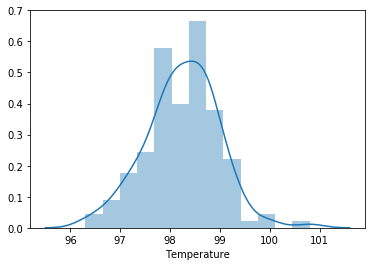

In [170]:
# 人体的温度是否服从正态分布
# 假设符合正态分布
0

In [165]:
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000stats.kstest(temperature,'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [166]:
stats.normaltest(temperature)

NormaltestResult(statistic=2.703801433319236, pvalue=0.2587479863488212)

In [208]:
stats.shapiro(temperature)

(0.9865769743919373, 0.2331680953502655)

In [210]:
stats.ttest_1samp(temperature,len(temperature)-1)

Ttest_1sampResult(statistic=-478.2061752972698, pvalue=1.9624789419214605e-211)

上面有两个p值》0.05 所以不能拒绝是正态分布

In [175]:
# 人体体温中存在的异常数据是哪些？
sigma = temperature.std()
mean = temperature.mean()
top = mean + sigma*3
end = mean - sigma*3
print("区间 ：["+str(end)+","+str(top)+"]")

区间 ：[96.04968129511393,100.4487802433476]


In [179]:
data[(data["Temperature"]>top)|( data["Temperature"]<end)]

,Temperature,Gender,HeartRate
129,100.8,2,77


In [190]:
p25 = temperature.quantile(.25)
p75= temperature.quantile(.75)
Q = p75 - p25
top = p75+Q*1.5
end = p25-Q*1.5
print("区间 ：["+str(end)+","+str(top)+"]")

区间 ：[96.44999999999999,100.05000000000001]


In [191]:
data[(data["Temperature"]>top)|( data["Temperature"]<end)]

,Temperature,Gender,HeartRate
0,96.3,1,70
65,96.4,2,69
129,100.8,2,77


In [195]:
#男女体温是否存在明显差异？
manT = data[(data["Gender"]==1)]["Temperature"]
womanT = data[(data["Gender"]==2)]["Temperature"]
print(manT.mean())
print(womanT.mean())
# H0 = mu1 -mu2 = 0

98.1046153846154
98.39384615384616


In [197]:
mu1 =  manT.mean()
mu2 =  womanT.mean()
sigma1 =  manT.var()
sigma2 =  womanT.var()
sigma = (sigma1/len(data)+sigma2/len(data))**.5
z = (mu1-mu2-0)/sigma
z

-3.2320925197895405

In [198]:
za2 = stats.norm.isf(0.05/2)
za2

1.9599639845400545

In [199]:
abs(z)>za2

True

 拒绝域内，假设失败，有明显差距

In [200]:
T_H_pearsonr=stats.pearsonr(data['Temperature'],data['HeartRate'])
print(T_H_pearsonr)

(0.25365640272076423, 0.003591489250708233)


0.25365640272076423 较小 相关性弱